In [ ]:
# upload data
import numpy as np
import pandas as pd
import io
from google.colab import files

upload_data_folder = files.upload()

Saving spring-2021-dl-assignment-2.zip to spring-2021-dl-assignment-2.zip


In [ ]:
! unzip spring-2021-dl-assignment-2.zip 

Streaming output truncated to the last 5000 lines.
  inflating: wiki_labeled/wiki_labeled/91/38015491_1986-05-01_2004.png  
  inflating: wiki_labeled/wiki_labeled/91/38073191_1980-10-17_2012.png  
  inflating: wiki_labeled/wiki_labeled/91/3808291_1960-05-26_2008.png  
  inflating: wiki_labeled/wiki_labeled/91/38155391_1944-01-30_1966.png  
  inflating: wiki_labeled/wiki_labeled/91/3830291_1966-10-31_2014.png  
  inflating: wiki_labeled/wiki_labeled/91/38317691_1995-07-08_2012.png  
  inflating: wiki_labeled/wiki_labeled/91/38390091_1938-10-01_1960.png  
  inflating: wiki_labeled/wiki_labeled/91/38431891_1996-11-04_2013.png  
  inflating: wiki_labeled/wiki_labeled/91/38432191_1995-04-18_2014.png  
  inflating: wiki_labeled/wiki_labeled/91/38495591_1952-03-30_1968.png  
  inflating: wiki_labeled/wiki_labeled/91/38637791_1988-05-10_2010.png  
  inflating: wiki_labeled/wiki_labeled/91/386491_1968-12-03_2006.png  
  inflating: wiki_labeled/wiki_labeled/91/3871391_1979-01-08_2009.png  
  inf

In [2]:
# load struture data
import pandas as pd
import os
os.getcwd()
train_structure = pd.read_csv('wiki_labels.csv')
test_structure = pd.read_csv('wiki_judge.csv')
train_structure['full_path'] = train_structure['full_path'].astype("str")
#train_structure.head(10)
train_structure['full_path'].dtypes
train_structure['full_path'] = train_structure["full_path"].str.replace("^\[.|.\]$","")
train_structure['full_path'] = train_structure['full_path'].astype(str)
#train_structure['face_location'] = train_structure["face_location"].str.replace("^\[.|.\]$","")
#train_structure.face_location.str.split(" ",expand=True) 
train_structure.head(30)

,ID,dob,dob_str,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,age
0,2002,723671,['05-May-1981'],2009,17/10000217_1981-05-05_2009.png,1.0,['Sami Jauhojärvi'],[[111.29109473 111.29109473 252.66993082 252.6...,4.300962388,NaN,27.746119
1,2003,711677,['03-Jul-1948'],2008,12/100012_1948-07-03_2008.png,1.0,['Marc Okrand'],[[113.52 169.84 366.08 422.4 ]],4.329328832,NaN,59.582192
2,2004,705061,['23-May-1930'],1961,65/10001965_1930-05-23_1961.png,1.0,['Aleksandar Matanović'],[[ 1 1 634 440]],#NAME?,NaN,30.696804
3,2005,720044,['31-May-1971'],2012,16/10002116_1971-05-31_2012.png,0.0,['Diana Damrau'],[[171.61031405 75.5745124 266.76611571 170.7...,3.408442415,NaN,40.672146
4,2006,716189,['09-Nov-1960'],2012,02/10002702_1960-11-09_2012.png,0.0,['Krista Tippett'],[[274.7656324 57.77009008 376.88699455 159.8...,4.748056378,NaN,51.224201
5,2007,707745,['27-Sep-1937'],1971,41/10003541_1937-09-27_1971.png,1.0,['Bernie Whitebear'],[[ 79.35580189 26.65993396 197.60950472 144.9...,4.184828312,NaN,33.347032
6,2008,695763,['07-Dec-1904'],1982,39/100039_1904-12-07_1982.png,1.0,['Clarence Nash'],[[152.90731132 95.90456958 323.01553656 266.0...,3.006350125,1.10334,77.149087
7,2009,711000,['26-Aug-1946'],2007,13/10004113_1946-08-26_2007.png,1.0,['William W. Destler'],[[1 1 1 1]],#NAME?,NaN,60.435845
8,2010,723987,['17-Mar-1982'],2011,22/10004122_1982-03-17_2011.png,1.0,['Daniel Smith'],[[ 1 1 592 440]],#NAME?,NaN,28.877169
9,2011,697114,['19-Aug-1908'],1950,99/10004299_1908-08-19_1950.png,1.0,['Carl Greenberg'],[[107.58644628 107.58644628 298.77804959 298.7...,4.526657045,NaN,41.455023


In [3]:
# remove outliers
from scipy import stats
import numpy as np
train_structure = train_structure[(np.abs(stats.zscore(train_structure['age'])) < 4)]
train_structure.sort_values(by = 'age', ascending=False).head(30)

,ID,dob,dob_str,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,age
53131,55133,689628,['19-Feb-1888'],2009,78/1789078_1888-02-19_2009.png,0.0,['Aurora Quezon'],[[ 1 1 225 300]],#NAME?,NaN,120.949543
32117,34119,684882,['21-Feb-1875'],1996,18/325918_1875-02-21_1996.png,0.0,['Jeanne Calment'],[[ 68.64408706 102.68113059 221.24078295 255.2...,2.336629561,NaN,120.941324
48684,50686,690727,['22-Feb-1891'],2012,61/8976761_1891-02-22_2012.png,1.0,['A. A. Fredericks'],[[ 1 1 375 500]],#NAME?,NaN,120.938584
49101,51103,688187,['10-Mar-1884'],2005,86/30820386_1884-03-10_2005.png,1.0,['Robert Cruwys'],[[ 1 1 300 400]],#NAME?,NaN,120.896347
55078,57080,691115,['16-Mar-1892'],2013,25/6091925_1892-03-16_2013.png,1.0,['Abdul Majid Daryabadi'],[[ 1 1 480 640]],#NAME?,NaN,120.879909
1009,3011,687873,['01-May-1883'],2004,90/31029690_1883-05-01_2004.png,1.0,['Freddie Brooks'],[[1 1 1 1]],#NAME?,NaN,120.752740
10164,12166,687882,['10-May-1883'],2004,69/36132669_1883-05-10_2004.png,1.0,['Countess Alexandra von Zarnekau'],[[1 1 1 1]],#NAME?,NaN,120.729680
5404,7406,690837,['12-Jun-1891'],2012,99/38072999_1891-06-12_2012.png,1.0,['Bill Lindsay'],[[1 1 1 1]],#NAME?,NaN,120.640868
1585,3587,687924,['21-Jun-1883'],2004,19/22091919_1883-06-21_2004.png,1.0,['Merton Yarwood Williams'],[[1 1 1 1]],#NAME?,NaN,120.616210
14117,16119,691237,['16-Jul-1892'],2013,87/23205987_1892-07-16_2013.png,1.0,['George Skakel'],[[ 1 1 264 440]],#NAME?,NaN,120.546575


In [4]:
###### Obtain training data
train_tabular = train_structure[['gender', 'face_score','second_face_score']]
train_tabular['face_score'][train_tabular['face_score'] == '#NAME?'] = 0.
train_tabular['face_score'] = train_tabular['face_score'].astype('float32')
train_tabular['gender'] = train_tabular['gender'].fillna(2)
train_tabular['second_face_score'] = train_tabular['second_face_score'].fillna(0)
train_tabular.describe()
train_tabular

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,gender,face_score,second_face_score
0,1.0,4.300962,0.0
1,1.0,4.329329,0.0
2,1.0,0.000000,0.0
3,0.0,3.408442,0.0
4,0.0,4.748056,0.0
...,...,...,...
60322,1.0,4.029268,0.0
60323,1.0,0.000000,0.0
60324,1.0,3.494303,0.0
60325,1.0,0.000000,0.0


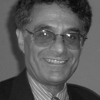

In [5]:
# load image data
import os
import tensorflow as tf
import re
import numpy as np
from tensorflow import keras
import cv2
from google.colab.patches import cv2_imshow
train_path = train_structure['full_path']
test_path = test_structure['full_path']
image = tf.keras.preprocessing.image.load_img(os.path.join('wiki_labeled/wiki_labeled',train_path[0]))
input_arr = keras.preprocessing.image.img_to_array(image)
image = cv2.imread(os.path.join('wiki_labeled/wiki_labeled',train_path[1]),0)
cv2_imshow(image)
train_img = np.empty([len(train_path), 100,100, 3])
for img_idx,path in zip(range(len(train_path)), train_path):
  train_img[img_idx,:,:,:] = cv2.imread(os.path.join('wiki_labeled/wiki_labeled',path))

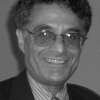

dtype('float32')

In [6]:
cv2_imshow(train_img[1,:,:,:])
train_img = train_img.astype('float32')
train_img.dtype

In [7]:
###### Obtain testing data
test_tabular = test_structure[['gender', 'face_score','second_face_score']]
test_tabular['face_score'][test_tabular['face_score'] == '#NAME?'] = 0.
test_tabular['face_score'] = test_tabular['face_score'].replace(-np.inf, 0.)
test_tabular['face_score'] = test_tabular['face_score'].astype('float32')
test_tabular['gender'] = test_tabular['gender'].fillna(2)
test_tabular['second_face_score'] = test_tabular['second_face_score'].fillna(0)
test_tabular.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,gender,face_score,second_face_score
count,1409.000000,1409.000000,1409.000000
mean,0.787083,3.219736,0.165144
std,0.458602,1.260113,0.609630
min,0.000000,0.000000,0.000000
25%,1.000000,2.252727,0.000000
50%,1.000000,3.245249,0.000000
75%,1.000000,4.198972,0.000000
max,2.000000,6.470719,4.690515


In [8]:
test_structure['full_path'] = test_structure['full_path'].astype("str")
#train_structure.head(10)
test_structure['full_path'].dtypes
test_structure['full_path'] = test_structure["full_path"].str.replace("^\[.|.\]$","")
test_structure['full_path'] = test_structure['full_path'].astype(str)
test_structure

,ID,full_path,gender,face_score,second_face_score
0,1,1.png,1.0,2.645639,1.949248
1,3,3.png,1.0,5.471801,NaN
2,4,4.png,1.0,3.582895,NaN
3,5,5.png,1.0,1.529254,NaN
4,6,6.png,1.0,1.241739,NaN
...,...,...,...,...,...
1404,1995,1995.png,1.0,3.452788,NaN
1405,1997,1997.png,1.0,3.748547,NaN
1406,1998,1998.png,0.0,3.597128,NaN
1407,1999,1999.png,1.0,3.245726,NaN


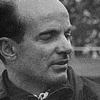

In [9]:
test_path = test_structure['full_path']
image = tf.keras.preprocessing.image.load_img(os.path.join('wiki_judge_images/wiki_judge_images',test_path[0]))
input_arr = keras.preprocessing.image.img_to_array(image)
image = cv2.imread(os.path.join('wiki_judge_images/wiki_judge_images',test_path[0]),0)
cv2_imshow(image)
test_img = np.empty([len(test_path), 100,100, 3])
for img_idx in range(len(test_path)):
  test_img[img_idx,:,:,:] = cv2.imread(os.path.join('wiki_judge_images/wiki_judge_images',test_path[img_idx]))

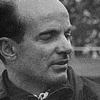

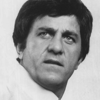

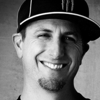

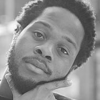

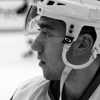

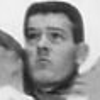

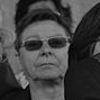

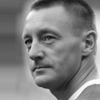

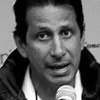

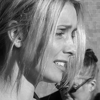

(1409, 100, 100, 3)

In [10]:
for i in range(10):
  cv2_imshow(test_img[i,:,:,0])
test_img = test_img.astype('float32')
test_img.dtype
test_img.shape

In [10]:
train_tabular

,gender,face_score,second_face_score
0,1.0,4.300962,0.0
1,1.0,4.329329,0.0
2,1.0,0.000000,0.0
3,0.0,3.408442,0.0
4,0.0,4.748056,0.0
...,...,...,...
60322,1.0,4.029268,0.0
60323,1.0,0.000000,0.0
60324,1.0,3.494303,0.0
60325,1.0,0.000000,0.0


In [11]:
test_tabular

,gender,face_score,second_face_score
0,1.0,2.645639,1.949248
1,1.0,5.471801,0.000000
2,1.0,3.582895,0.000000
3,1.0,1.529254,0.000000
4,1.0,1.241739,0.000000
...,...,...,...
1404,1.0,3.452788,0.000000
1405,1.0,3.748547,0.000000
1406,0.0,3.597128,0.000000
1407,1.0,3.245726,0.000000


# Solution to Age Prediction Challenge

After try out some self-defined CNN, it doesn't seem like they are doing a good job in extracting the features. Therefore, my solution is more CNN ImageNet pretrained model-based. In general, I implement several well-known keras pretrained model, and merge the top 2 performing test prediction. The model used below are xception net, efficientnet b7, resnet152 v2, DenseNet 201, VGG19, and merging xceptionnet with efficientnet. 

The preprocessing is given as above, we filter out images with face score of 0, and also we filter out the outliers that with age doesn't fall within our statistical test region. Although they are greyscale images, we still read it in the format of RGB channel (mode-3 tensor with the third dimension to be 3). 

The pretrained models only serves as the feature extraction purpose, and thus I don't consider including the top (classification head). Rather, except for one or two models, I mostly use global average pooling plus a dropout rate of 0.4 with regression head. The validation split is 0.15 for each case, with 100 epochs. For some cases, the experiment tells that data augmentation would work better but for some others, it is not the case, so the code below indicates for which case I augment the data and for which case I didn't.

It turns out that models that stands out are efficientnetb7, merged efficientnetb7 and xception net. Then I take the weighted average of these two test prediction as my final prediction result, which is 0.65 * efficientnetb7 + 0.35 * merge_efficientnetb7_xception. The final public score is 9.02659. 

There are many other ways to achieve a better result, and in the future it can be done to win at kaggle. What I can think of is to implement the stacking techniques, building model on the top of models. For instance, for all the models we used below, we can do a 6 fold split, then for each iteration, use 5 fold to train model, and predict on the last fold as well as the test set. The prediction on the test set should be the average of all 6 folds prediction on the test set. Then we repeat these steps for different models and obtain predictions (e.g., 6 models correspond to 6 columns of predictions), and treat them as the new variables to predict for the real age.

# Use Keras Pretrained Model

# Merge EfficientNet and XceptionNet

In [10]:
# example of tending the vgg19 model
from keras.applications.vgg19 import VGG19
# from keras.applications.xception import preprocess_input
from keras.applications.xception import Xception
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
#from keras.applications.vgg19 import preprocess_input
from keras.layers import LeakyReLU
from keras.regularizers import l2
#from keras.applications.efficientnet import preprocess_input
#from keras.applications.efficientnet import EfficientNetB7
#!pip install tf-nightly
from tensorflow.keras.applications.efficientnet import *
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.applications.densenet import DenseNet201

img_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.1),
        preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomFlip(),
        preprocessing.RandomContrast(factor=0.1)
    ],
    name="img_augmentation",
)


target = pd.DataFrame(train_structure['age'])
# load model without classifier layers

inputs1 = layers.Input(shape=(100, 100, 3))
x1 = img_augmentation(inputs1)
inputs2 = layers.Input(shape=(100, 100, 3))
x2 = img_augmentation(inputs2)
model = EfficientNetB7(include_top= False, input_tensor = x1, pooling = 'avg',weights= 'imagenet')
model1 = Xception(include_top= False, input_tensor = x2, pooling = 'avg',weights= 'imagenet')


merge = keras.layers.concatenate([model.output, model1.output])

drop = keras.layers.Dropout(0.5)(merge)



output = Dense(1, activation='linear')(drop)
# define new model
model = Model(inputs= [inputs1, inputs2], outputs=output)
# summarize
model.summary()

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights = True)
]

image_train1 = preprocess_input(train_img[train_tabular['face_score'] != 0,:,:,:])
image_train2 =  keras.applications.xception.preprocess_input(train_img[train_tabular['face_score'] != 0,:,:,:])


model.compile(loss = 'mse', 
                optimizer = "adam",
                metrics = 'mse')


model.fit(x = [image_train1,image_train2], y = target[train_tabular['face_score'] != 0], epochs = 100, batch_size=20,
         validation_split = 0.15, callbacks = my_callbacks)



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
img_augmentation (Sequential)   (None, 100, 100, 3)  0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 100, 100, 3)  0           img_augmentation[0][0]           
__________________________________________________________________________________________________
normalization (Normalization)   (None, 100, 100, 3)  7           rescaling[0][0]              

In [12]:
image_test1 = preprocess_input(test_img)
image_test2 = keras.applications.xception.preprocess_input(test_img)
prediction = model.predict([image_test1,image_test2])
sub = pd.read_csv('sample_submission.csv')
sub = sub[sub['ID'].isin(test_structure['ID'])]
sub['age'] = prediction
#sub['age'] = sub['age'].mask(abs(sub['age']) < 3, 0)
from google.colab import files
sub.to_csv('judge-predict-efficientnetb7-xception.csv', index = False)
files.download('judge-predict-efficientnetb7-xception.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# DenseNet 201

In [23]:
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LeakyReLU
from keras.regularizers import l2
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.applications.densenet import preprocess_input 
from tensorflow.keras.applications.densenet import DenseNet201
img_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.1),
        preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)


target = pd.DataFrame(train_structure['age'])
# load model without classifier layers
#model = EfficientNetB7(include_top= False, input_shape = [100,100,3], pooling = 'avg',weights= 'imagenet')
# add new classifier layers
inputs = layers.Input(shape=(100, 100, 3))
x = img_augmentation(inputs)

model = DenseNet201(include_top= False, input_tensor = x, pooling = 'avg',weights= 'imagenet')


#glb_avg =  keras.layers.GlobalAveragePooling2D()(model.layers[-1].output)
drop = keras.layers.Dropout(0.4)(model.output)



output = Dense(1, activation='linear')(drop)
# define new model
model = Model(inputs= inputs, outputs=output)
# summarize
model.summary()

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights = True)
]

image_train = preprocess_input(train_img[train_tabular['face_score'] != 0,:,:,:])
model.compile(loss = 'mse', 
                optimizer = "adam",
                metrics = 'mse')


model.fit(x = image_train, y = target[train_tabular['face_score'] != 0], epochs = 100, batch_size=32,
         validation_split = 0.2, callbacks = my_callbacks)



74842112/74836368 [==============================] - 1s 0us/step
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
img_augmentation (Sequential)   (None, 100, 100, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0           img_augmentation[0][0]           
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 50, 50, 64)   9408        zero_padding2d[0][0]             
___________________________

In [31]:
image_test = preprocess_input(test_img)
prediction = model.predict(image_test)
sub = pd.read_csv('sample_submission.csv')
sub = sub[sub['ID'].isin(test_structure['ID'])]
sub['age'] = prediction
#sub['age'] = sub['age'].mask(abs(sub['age']) < 3, 0)
from google.colab import files
sub.to_csv('judge-predict-densenet201.csv', index = False)
files.download('judge-predict-densenet201.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Efficientnet B7

In [13]:
# example of tending the efficientnetb7 model
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
#from keras.applications.vgg19 import preprocess_input
from keras.layers import LeakyReLU
from keras.regularizers import l2
#from keras.applications.efficientnet import preprocess_input
#from keras.applications.efficientnet import EfficientNetB7
#!pip install tf-nightly
from tensorflow.keras.applications.efficientnet import *
img_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.1),
        preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)



target = pd.DataFrame(train_structure['age'])
inputs = layers.Input(shape=(100, 100, 3))
x = img_augmentation(inputs)

model = EfficientNetB7(include_top= False, input_tensor = x, pooling = 'avg',weights= 'imagenet')


#glb_avg =  keras.layers.GlobalAveragePooling2D()(model.layers[-1].output)
drop = keras.layers.Dropout(0.4)(model.output)



output = Dense(1, activation='linear')(drop)
# define new model
model = Model(inputs= inputs, outputs=output)

# summarize
model.summary()

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights = True)
]

image_train = preprocess_input(train_img[train_tabular['face_score'] != 0,:,:,:])
model.compile(loss = 'mse', 
                optimizer = "adam",
                metrics = 'mse')


model.fit(x = image_train, y =  target[train_tabular['face_score'] != 0], epochs = 100, batch_size=32,
         validation_split = 0.15, callbacks = my_callbacks)



Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
img_augmentation (Sequential)   (None, 100, 100, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 100, 100, 3)  0           img_augmentation[0][0]           
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 100, 100, 3)  7           rescaling_1[0][0]                
____________________________________________________________________________________________

In [14]:
image_test = preprocess_input(test_img)
prediction = model.predict(image_test)
sub = pd.read_csv('sample_submission.csv')
sub = sub[sub['ID'].isin(test_structure['ID'])]
sub['age'] = prediction
#sub['age'] = sub['age'].mask(abs(sub['age']) < 3, 0)
from google.colab import files
sub.to_csv('judge-predict-efficientnet-b7.csv', index = False)
files.download('judge-predict-efficientnet-b7.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Xception Pretrained Model


In [ ]:
from keras.applications.xception import preprocess_input
from keras.applications.xception import Xception
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
#from keras.applications.vgg19 import preprocess_input
from keras.layers import LeakyReLU
from keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

img_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.15),
        preprocessing.RandomTranslation(height_factor=0.15, width_factor=0.15),
        preprocessing.RandomFlip(),
        preprocessing.RandomZoom(height_factor = 0.15),
        preprocessing.RandomContrast(factor=0.15)
    ],
    name="img_augmentation",
)

target = pd.DataFrame(train_structure['age'])


inputs = layers.Input(shape=(100, 100, 3))
x = img_augmentation(inputs)

model = Xception(include_top= False, input_tensor = x, pooling = 'avg',weights= 'imagenet')

drop = keras.layers.Dropout(0.4)(model.output)

output = Dense(1, activation='linear')(drop)
# define new model
model = Model(inputs= inputs, outputs=output)
# summarize
model.summary()

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights = True)
]

image_train = preprocess_input(train_img[train_tabular['face_score'] != 0,:,:,:])
model.compile(loss = 'mse', 
                optimizer = "adam",
                metrics = 'mse')


model.fit(x = image_train, y = target[train_tabular['face_score'] != 0], epochs = 100, batch_size=32,
         validation_split = 0.15, callbacks = my_callbacks)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
img_augmentation (Sequential)   (None, 100, 100, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 49, 49, 32)   864         img_augmentation[0][0]           
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 49, 49, 32)   128         block1_conv1[0][0]               
____________________________________________________________________________________________

In [ ]:
image_test = preprocess_input(test_img)
prediction = model.predict(image_test)
sub = pd.read_csv('sample_submission.csv')
sub = sub[sub['ID'].isin(test_structure['ID'])]
sub['age'] = prediction
#sub['age'] = sub['age'].mask(abs(sub['age']) < 3, 0)
from google.colab import files
sub.to_csv('judge-predict-xception.csv', index = False)
files.download('judge-predict-xception.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# VGG 19

In [11]:

from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.applications.vgg19 import preprocess_input
from keras.layers import LeakyReLU
from keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

img_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.15),
        preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomFlip(),
        preprocessing.RandomContrast(factor=0.1)
    ],
    name="img_augmentation",
)

target = pd.DataFrame(train_structure['age'])


inputs = layers.Input(shape=(100, 100, 3))
#x = img_augmentation(inputs)

model = VGG19(include_top= False, input_tensor = inputs, weights= 'imagenet')

flatten = keras.layers.Flatten()(model.output)

#drop = keras.layers.Dropout(0.2)(model.output)
fc1 = keras.layers.Dense(1024)(flatten)

fc2 = keras.layers.Dense(1024)(fc1)
output = Dense(1, activation='linear')(fc2)
# define new model
model = Model(inputs= inputs, outputs=output)
# summarize
model.summary()

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights = True)
]

image_train = preprocess_input(train_img[train_tabular['face_score'] != 0,:,:,:])
model.compile(loss = 'mse', 
                optimizer = "adam",
                metrics = 'mse')


model.fit(x = image_train, y = target[train_tabular['face_score'] != 0], epochs = 100, batch_size=32,
         validation_split = 0.15, callbacks = my_callbacks)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

# ResNet 152 V2


In [13]:
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.resnet_v2 import preprocess_input
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LeakyReLU
from keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


img_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.15),
        preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomFlip(),
        preprocessing.RandomContrast(factor=0.1)
    ],
    name="img_augmentation",
)

target = pd.DataFrame(train_structure['age'])


inputs = layers.Input(shape=(100, 100, 3))
x = img_augmentation(inputs)

model = ResNet152V2(include_top= False, input_tensor = x, pooling = 'avg',weights= 'imagenet')

drop = keras.layers.Dropout(0.3)(model.output)

output = Dense(1, activation='linear')(drop)
# define new model
model = Model(inputs= inputs, outputs=output)
# summarize
model.summary()

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights = True)
]

image_train = preprocess_input(train_img[train_tabular['face_score'] != 0,:,:,:])
model.compile(loss = 'mse', 
                optimizer = "adam",
                metrics = 'mse')


model.fit(x = image_train, y = target[train_tabular['face_score'] != 0], epochs = 100, batch_size=32,
         validation_split = 0.15, callbacks = my_callbacks)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
img_augmentation (Sequential)   (None, 100, 100, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           img_augmentation[0][0]           
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
______________________________________________________________________________________________

In [ ]:
image_test = preprocess_input(test_img)
prediction = model.predict(image_test)
sub = pd.read_csv('sample_submission.csv')
sub = sub[sub['ID'].isin(test_structure['ID'])]
sub['age'] = prediction
#sub['age'] = sub['age'].mask(abs(sub['age']) < 3, 0)
from google.colab import files
sub.to_csv('judge-predict-resnetv2152.csv', index = False)
files.download('judge-predict-resnetv2152.csv')